# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from statsmodels.stats.outliers_influence import variance_inflation_factor


## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [3]:
data=pd.read_csv("Categorical.csv")
data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


Remove the duplicate index column from the dataset. 

In [5]:
data.drop_duplicates()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


In [7]:
data["continent"].unique()

array(['North America', 'Asia', 'Africa', 'Europe', 'South America',
       'Oceania', 'Antarctica', 'Seven seas (open ocean)'], dtype=object)

## Map the data

Use the <i>'continent'</i> category for this analysis.

In [8]:
data_mapped=data.copy()

In [10]:
data_mapped["continent"]=data_mapped["continent"].map({"North America":0,"Asia":1,"Africa":2,"Europe":3,"South America":4,"Oceania":5,"Antarctica":6,"Seven seas (open ocean)":7})

In [11]:
data_mapped

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,2
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,3
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5
237,Yemen,47.586762,15.909280,1
238,South Africa,25.083901,-29.000341,2
239,Zambia,27.774759,-13.458242,2


## Select the features

In [12]:
x=data_mapped.iloc[:,1:4]
x

,Longitude,Latitude,continent
0,-69.982677,12.520880,0
1,66.004734,33.835231,1
2,17.537368,-12.293361,2
3,-63.064989,18.223959,0
4,20.049834,41.142450,3
...,...,...,...
236,-172.164851,-13.753243,5
237,47.586762,15.909280,1
238,25.083901,-29.000341,2
239,27.774759,-13.458242,2


## Clustering

Use 4 clusters initially.

In [25]:
kmeans=KMeans(8)
k_proc=kmeans.fit(x)
k_proc.predict(x)

array([2, 6, 7, 2, 0, 0, 0, 6, 2, 6, 5, 7, 1, 7, 2, 1, 0, 6, 7, 0, 3, 3,
       4, 0, 6, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 4, 4, 7, 3, 0, 2, 4, 3, 3,
       7, 3, 5, 2, 7, 3, 2, 2, 2, 2, 6, 6, 0, 0, 6, 2, 0, 2, 3, 2, 6, 6,
       0, 0, 6, 0, 1, 2, 0, 0, 1, 3, 0, 6, 0, 3, 3, 3, 3, 3, 0, 2, 0, 2,
       1, 2, 4, 7, 2, 0, 2, 0, 4, 0, 4, 4, 7, 0, 6, 6, 0, 6, 0, 2, 0, 6,
       4, 6, 6, 7, 6, 4, 2, 2, 4, 0, 6, 4, 6, 3, 0, 2, 0, 4, 7, 0, 0, 0,
       4, 2, 3, 0, 0, 7, 4, 2, 1, 0, 3, 0, 4, 0, 4, 1, 7, 3, 2, 7, 7, 4,
       7, 1, 3, 1, 3, 2, 5, 0, 0, 4, 1, 1, 6, 6, 2, 5, 2, 4, 1, 1, 0, 2,
       4, 0, 2, 6, 5, 6, 0, 4, 7, 3, 6, 6, 7, 3, 4, 2, 3, 1, 3, 2, 0, 6,
       7, 2, 0, 3, 2, 0, 0, 0, 7, 2, 7, 6, 2, 3, 3, 4, 6, 6, 1, 5, 2, 0,
       6, 4, 7, 7, 0, 2, 2, 6, 0, 2, 2, 2, 2, 4, 1, 5, 5, 6, 7, 7, 7])

## Clustering results

In [26]:
data_clustered=data_mapped.copy()

In [27]:
identified_cluster=k_proc.predict(x)

In [28]:
data_clustered["cluster"]=identified_cluster

In [29]:
data_clustered

,name,Longitude,Latitude,continent,cluster
0,Aruba,-69.982677,12.520880,0,2
1,Afghanistan,66.004734,33.835231,1,6
2,Angola,17.537368,-12.293361,2,7
3,Anguilla,-63.064989,18.223959,0,2
4,Albania,20.049834,41.142450,3,0
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5,5
237,Yemen,47.586762,15.909280,1,6
238,South Africa,25.083901,-29.000341,2,7
239,Zambia,27.774759,-13.458242,2,7


## Plot the data

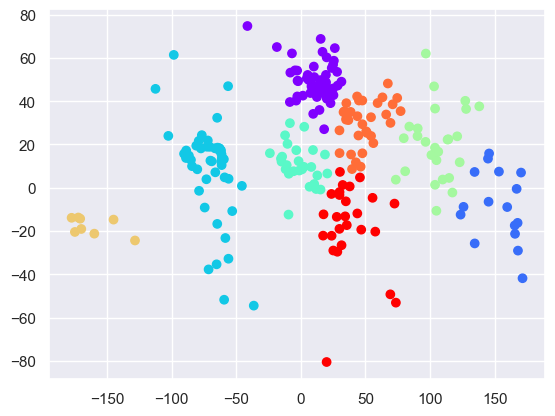

In [30]:
plt.scatter(data_clustered["Longitude"],data_clustered["Latitude"],c=data_clustered["cluster"],cmap="rainbow")
plt.show()

Since you already have all the code necessary, go back and play around with the number of clusters. Try 3, 7 and 8 and see if the results match your expectations. 

Simply go back to the beggining of the <b> Clustering </b> section and change <i> kmeans = KMeans(4) </i> to <i> kmeans = KMeans(3) </i>. Then run the remaining cells until the end.